In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.set_index(['Index'])

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
df.dtypes

Index          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All values are float

In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Index        0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values

In [7]:
df.nunique()

Index        200
TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [8]:
df.columns

Index(['Index', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

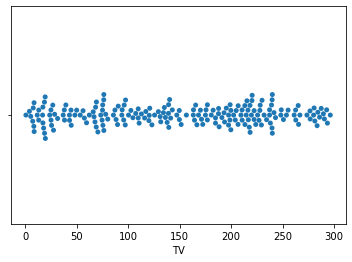

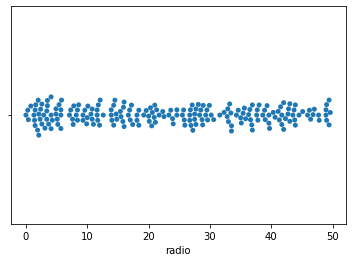

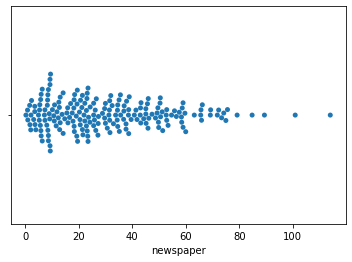

In [9]:
col = ['TV', 'radio', 'newspaper']
for i in col:
    ax = sb.swarmplot(x = i, data = df)
    plt.show()

We can see that all the variables are uniformly distributed except for a small number of outliers in newspaper column. 

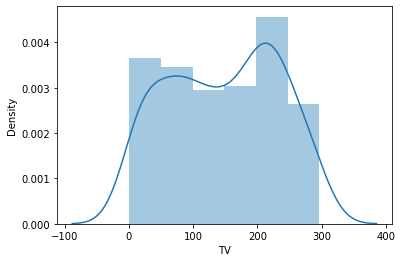

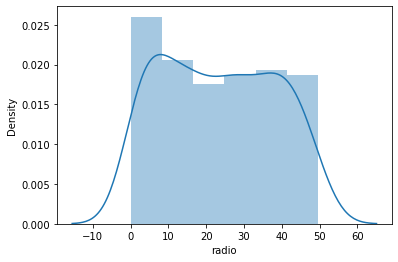

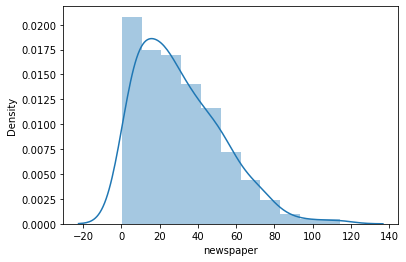

In [10]:
#Plotting distplot to check for skewness.
for i in col: 
    sb.distplot(df[i], kde = True)
    plt.show()

The newspaper column seems to be slightly skewed. 

In [11]:
df.skew()

Index        0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

 +/- 0.5 being the limitk for data with no skewness, we can see that there is a slight skewness in the Newspaper column. 
    
We can ignore the sales column as it's the Y variable. 

### Describing the Dataset

In [12]:
df.describe()

,Index,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

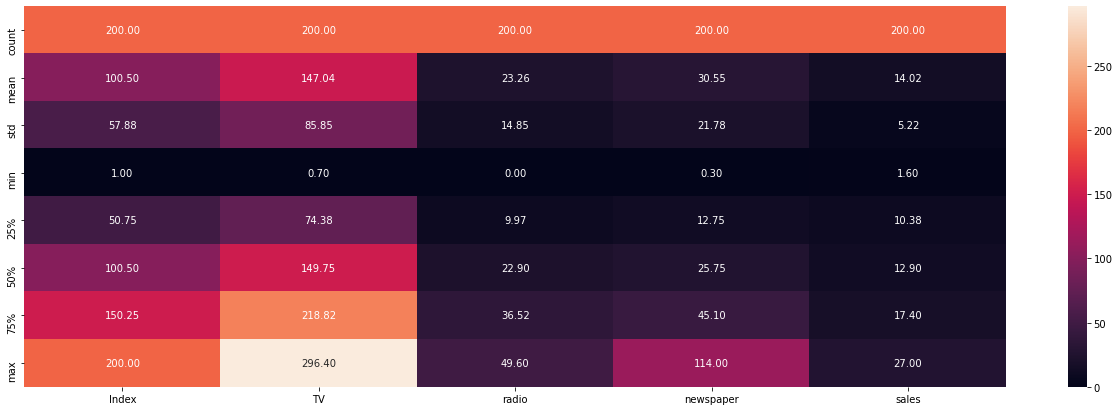

In [13]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

There are no high variances between the mean and the max values & for the 75th percentile and the max values.

### Checking the correlation

In [14]:
df.corr()

,Index,TV,radio,newspaper,sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

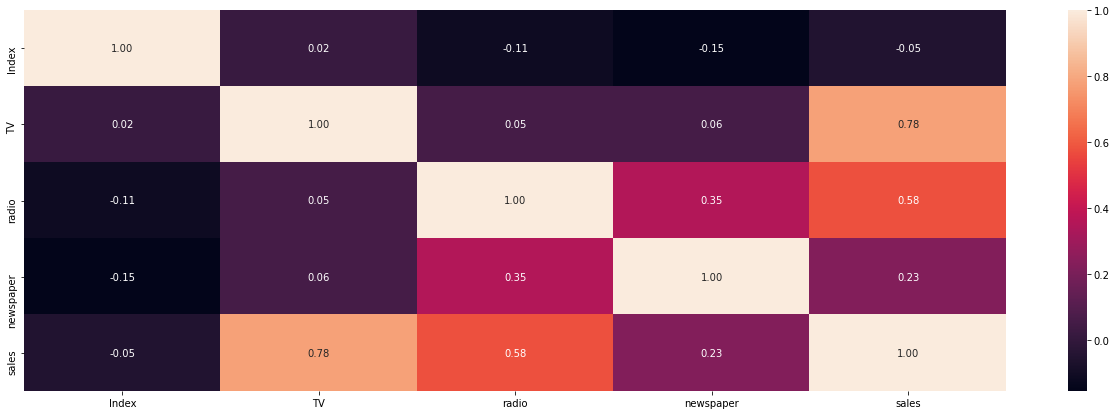

In [15]:
plt.figure(figsize = (22,7))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

There is a high correlation between TV and Sales, lesser correlation between radio and sales, and even lesser correlation between newspaper and sales. 

Advertising on TV turns out the best method for increasing sales. 

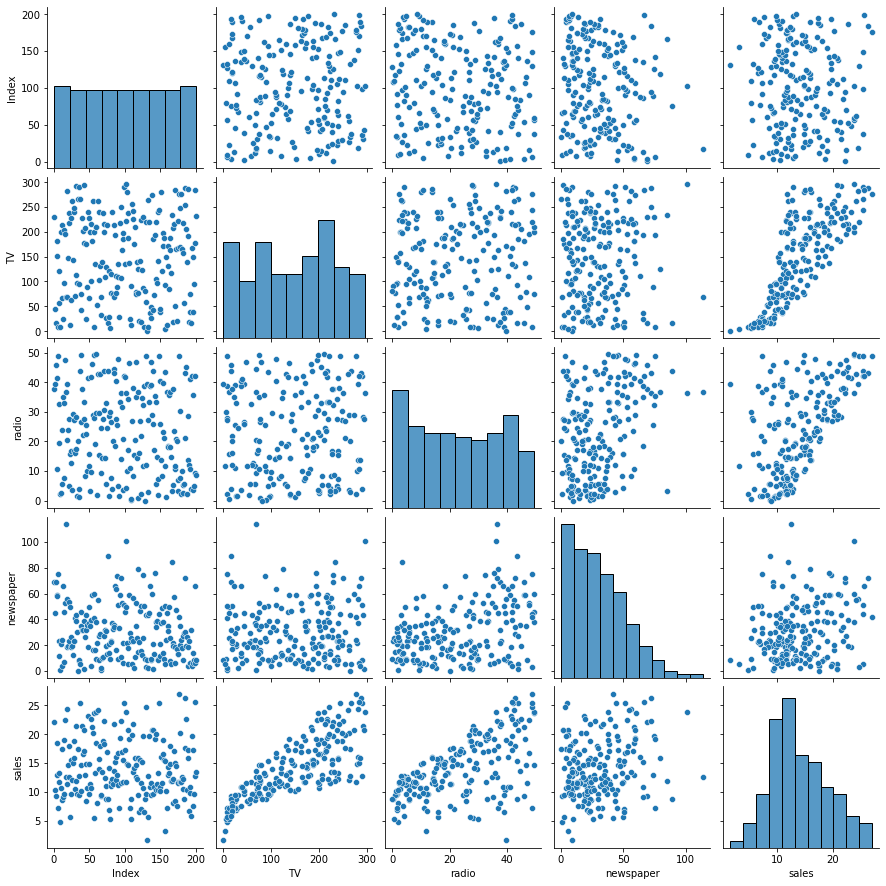

In [16]:
sb.pairplot(df)

### Considering the outlier removal

In [17]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

We can see there are only less number of outliers, so we can proceed to remove them. 

In [18]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
df_new.shape

(198, 5)

In [20]:
#Finding the percentage of dataloss

loss = ((200-198)/200)*100
loss

1.0

Since there is only 1% of dataloss, we can proceed to remove the outliers. 

<AxesSubplot:>

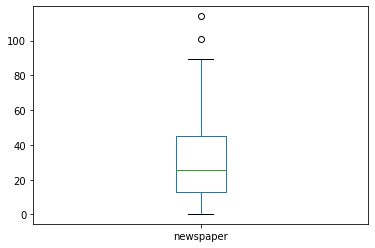

In [21]:
df['newspaper'].plot.box()

In [22]:
df = df_new

In [23]:
df.shape

(198, 5)

### Separating columns into X and Y

In [24]:
x = df.iloc[:, 1:4]

In [25]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
y = df.iloc[:, -1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Scaling the data using Min-Max scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [28]:
x = mms.fit_transform(x)

In [29]:
x.shape

(198, 3)

In [30]:
y.shape

(198,)

### Finding the best random state

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [42]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}')
    print('\n')

At random state 0, the training accuracy is: 0.88586994520838
At random state 0, the testing accuracy is: 0.9068225024835147


At random state 1, the training accuracy is: 0.8860896909195269
At random state 1, the testing accuracy is: 0.9057939794969587


At random state 2, the training accuracy is: 0.9137739454384091
At random state 2, the testing accuracy is: 0.8584029190210046


At random state 3, the training accuracy is: 0.9023834789281909
At random state 3, the testing accuracy is: 0.8809940152870163


At random state 4, the training accuracy is: 0.9002938768700731
At random state 4, the testing accuracy is: 0.8721688368509894


At random state 5, the training accuracy is: 0.895935137523506
At random state 5, the testing accuracy is: 0.8875354306856444


At random state 6, the training accuracy is: 0.9017449009440632
At random state 6, the testing accuracy is: 0.8796613306000014


At random state 7, the training accuracy is: 0.89222748011076
At random state 7, the testing accurac

At random state 78, the training accuracy is: 0.9169621323843647
At random state 78, the testing accuracy is: 0.7976203398705746


At random state 79, the training accuracy is: 0.8917819750398744
At random state 79, the testing accuracy is: 0.8913420600945413


At random state 80, the training accuracy is: 0.9101016022238976
At random state 80, the testing accuracy is: 0.8542644746016084


At random state 81, the training accuracy is: 0.8860270981868439
At random state 81, the testing accuracy is: 0.9153799142358502


At random state 82, the training accuracy is: 0.9135664204633508
At random state 82, the testing accuracy is: 0.8318705857447494


At random state 83, the training accuracy is: 0.8977455609604108
At random state 83, the testing accuracy is: 0.8885888832949177


At random state 84, the training accuracy is: 0.8773468497888726
At random state 84, the testing accuracy is: 0.9313062022373504


At random state 85, the training accuracy is: 0.9176717840377813
At random state 85

We get the best training and testing accuracy at random state 41. 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 41)

In [44]:
x_train.shape

(138, 3)

In [45]:
x_test.shape

(60, 3)

In [46]:
y_train.shape

(138,)

In [47]:
y_test.shape

(60,)

### Running regressor models

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [90]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [91]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.8936014169419066
Mean absolute error:  1.1963503738157542
Mean squared error:  3.275795359225156
Root mean squared error:  1.809915843133364
R2 Score:  0.8933767863464055



KNeighborsRegressor()
Score:  0.9649062930720114
Mean absolute error:  0.952333333333333
Mean squared error:  2.211513333333333
Root mean squared error:  1.4871157767078302
R2 Score:  0.9280178909913507



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  0.8483333333333334
Mean squared error:  1.2755
Root mean squared error:  1.1293803610830144
R2 Score:  0.9584840033941168



SVR()
Score:  0.9297384930642448
Mean absolute error:  1.0308043376867044
Mean squared error:  2.908695771552174
Root mean squared error:  1.705489891952507
R2 Score:  0.9053254380405276



RandomForestRegressor()
Score:  0.9969773203074497
Mean absolute error:  0.6150999999999994
Mean squared error:  0.7000216999999971
Root mean squared error:  0.8366729946639828
R2 Score:  0.9772151324804041



Lasso()


### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

Using for loop to find the best cross val score which gives us the best values.

In [92]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')

LinearRegression()
[0.8886177292201751, 0.8890406332045909, 0.8880501918930908, 0.8853605756683912, 0.8868174285063072, 0.8838282894864758, 0.8880334554150218, 0.8810485430282271]
CV Value =  3
Best Score = 0.8890406332045909


KNeighborsRegressor()
[0.9342141967199984, 0.9267174295815545, 0.9476918344554206, 0.9488587105643586, 0.9450574094562446, 0.9477224849519468, 0.9457554856457697, 0.9446634380206663]
CV Value =  5
Best Score = 0.9488587105643586


DecisionTreeRegressor()
[0.9060961084605024, 0.9390622724377895, 0.9403511001177067, 0.9499110021001942, 0.9467877721844702, 0.9464029733092175, 0.9450568879964085, 0.940039074186601]
CV Value =  5
Best Score = 0.9499110021001942


SVR()
[0.8680671763474577, 0.9062559503669076, 0.9143720909419177, 0.9203401233430398, 0.9223933576167607, 0.9204114789057524, 0.9237605861486065, 0.9238505080329976]
CV Value =  9
Best Score = 0.9238505080329976


RandomForestRegressor()
[0.9699557728844925, 0.9739622421360289, 0.9772650818817993, 0.9759792

RandomForestRegressor turned out to be the model with the least difference between R2_Score and Cross_val_score.

The CV number with gives the best result is 9

### Doing the RandomForestRegressor separately

In [95]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr = rfr.predict(x_test)

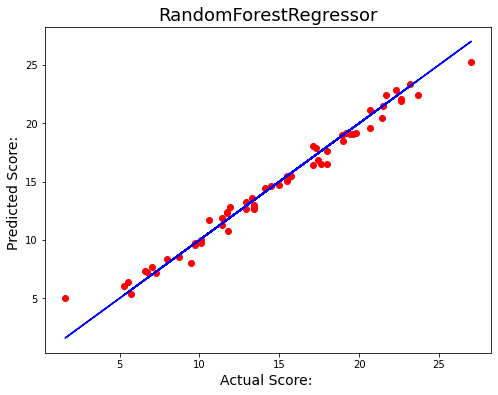

In [109]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

The model looks like a good fit.

### Regularization using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [103]:
rfr_reg = RandomForestRegressor(criterion = 'mse', max_features = 'auto')
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_train, y_train)
rfr_reg.score(x_train, y_train)
predrfr_reg = rfr_reg.predict(x_test)
data = [predrfr_reg, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.286,16.571,14.493,9.862,23.305,11.77,19.244,19.13,22.54,17.716,...,12.373,10.854,13.177,18.752,11.304,8.503,14.321,10.058,7.055,17.981
Actual,15.500,18.000,15.000,9.700,22.300,10.60,19.600,19.40,22.60,18.000,...,11.700,11.800,12.900,19.200,11.400,9.500,14.100,10.100,6.600,17.100


In [104]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr_reg))
print('Mean squared error: ', mean_squared_error(y_test,predrfr_reg))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr_reg)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr_reg))

Errors:


Mean absolute error:  0.6131999999999986
Mean squared error:  0.7261435999999943
Root mean squared error:  0.8521405987276949


R2 Score:  0.9763648959365083


We're getting a model accuracy of 97% which is quite good. 

### Saving the model

In [105]:
import joblib
joblib.dump(rfr_reg, 'Advertising.obj')

['Advertising.obj']

### Conclsion

In [106]:
final = joblib.load('Advertising.obj')
final.predict(x_train)

array([10.717, 13.286, 12.693, 12.001, 25.718, 12.382,  8.607,  4.276,
       16.275,  7.059,  8.929, 13.367, 25.078, 11.56 , 20.117, 15.063,
        6.48 ,  9.254,  7.183,  8.36 , 15.924, 14.258, 12.799, 15.079,
       17.043, 20.971, 14.869, 11.518, 14.537,  4.981, 13.796, 10.434,
        7.759,  7.335,  9.534, 11.971, 18.881,  9.519, 10.567, 11.879,
       18.563, 10.966, 12.141, 10.587, 11.062, 23.708, 23.237,  8.788,
       15.383, 13.086, 11.637, 10.658, 10.507, 25.28 , 13.902, 21.901,
       12.898, 24.398, 11.504,  6.466, 12.13 , 11.635, 12.739, 12.089,
       24.209, 11.037, 12.265, 17.248, 18.552, 10.374,  9.585, 13.068,
        5.442,  9.54 , 18.283, 15.101, 14.93 , 20.474, 14.374, 14.852,
       11.639, 14.254,  7.369, 21.735,  9.887, 10.37 , 16.884, 11.051,
        8.801, 18.409, 20.514,  8.645,  9.78 , 16.175, 11.811,  6.074,
        9.565, 17.044, 10.093, 16.341,  8.927,  7.278, 15.551, 10.677,
       15.845, 12.407,  8.954, 14.153, 12.461,  8.163, 13.223, 11.923,
      

In [107]:
conclusion = pd.DataFrame([final.predict(x_test)[:], predrfr_reg[:]], index = ['Predicted', 'Original'])

In [108]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.286,16.571,14.493,9.862,23.305,11.77,19.244,19.13,22.54,17.716,...,12.373,10.854,13.177,18.752,11.304,8.503,14.321,10.058,7.055,17.981
Original,15.286,16.571,14.493,9.862,23.305,11.77,19.244,19.13,22.54,17.716,...,12.373,10.854,13.177,18.752,11.304,8.503,14.321,10.058,7.055,17.981
